# Load in state dict of best model. Feed in a couple of images, and see what the reconstruction gets right, and as a bonus, what the latent representations appear as. 

In [1]:
import matplotlib.pyplot as plt
import os 
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import torchvision
from noah_autoencoder import *

from src.utils.data_helper import UnlabeledDataset

from src.utils.helper import collate_fn, draw_box

In [2]:
## Neccessary imports

batch_size   = 4
epochs       = 25 #30 before, 0 to go immediately to test... 


# optimizer parameter
learning_rate = 1e-3
weight_decay  = 0


model = Car_Autoencoder(Inception_Autoencoder,Encoder,Decoder,InceptionE,BasicConv2d,in_ch=3,base_ch=32)

f_out = 'autoencoder_results_%.1e_%.1e_%d_%s.txt'\
               %(learning_rate, weight_decay, batch_size,str(epochs))

# best-model fname
f_best_model = 'BestAutoencoder_%.1e_%.1e_%d.pt'\
               %(learning_rate, weight_decay, batch_size)

if os.path.exists(f_best_model):  
    print('loading best model...')
    model.load_state_dict(torch.load(f_best_model,map_location=torch.device('cpu')))
    
transform = torchvision.transforms.ToTensor()


loading best model...


In [3]:
# All the images are saved in image_folder
# All the labels are saved in the annotation_csv file
batch_size = 1
image_folder = '/Users/noahkasmanoff/Desktop/Deep_Learning/car/dat/data/'
#image_folder = '/scratch/nsk367/pytorch-use/DLSP20/dat/data'#'../dat/data/'
annotation_csv = image_folder + '/annotation.csv'

unlabeled_scene_index_train = np.arange(89)
unlabeled_scene_index_valid = np.arange(100,106) #only load some from the end

unlabeled_trainset = UnlabeledDataset(image_folder=image_folder, scene_index=unlabeled_scene_index_train, 
                                      first_dim='sample', transform=transform)
unlabeled_trainloader = torch.utils.data.DataLoader(unlabeled_trainset, batch_size=batch_size, 
                                                    shuffle=True, num_workers=2)

unlabeled_validset = UnlabeledDataset(image_folder=image_folder, scene_index=unlabeled_scene_index_valid, 
                                      first_dim='sample', transform=transform)
unlabeled_validloader = torch.utils.data.DataLoader(unlabeled_validset, batch_size=batch_size, 
                                                    shuffle=True, num_workers=2)




From the validation data, plot some reconstructions. Compare them with target, and visualize what the fourth channel of z looks like. z is 128 channels in total! 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loss =  0.00016063438670244068


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loss =  0.00019011544645763934


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loss =  0.00016122871602419764


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loss =  8.860432717483491e-05


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loss =  0.00016315515676978976


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loss =  0.00014070932229515165


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/noahkasmanoff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loss =  0.0004325320478528738


/Users/noahkasmanoff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
/Users/noahkasmanoff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loss =  0.00012361796689219773


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loss =  0.0002341927756788209


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loss =  0.00015431300562340766
Loss =  9.964068158296868e-05


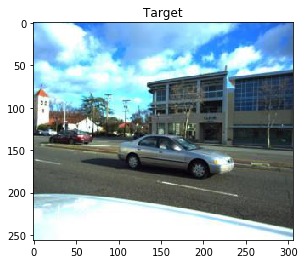

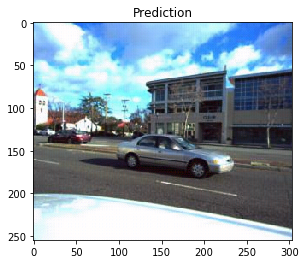

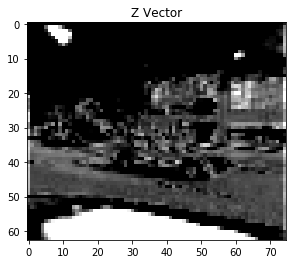

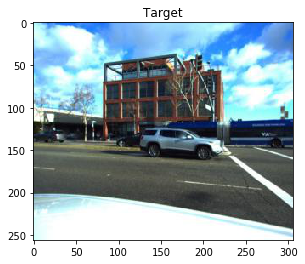

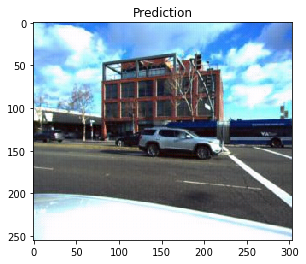

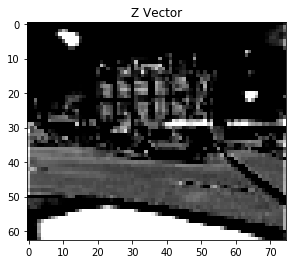

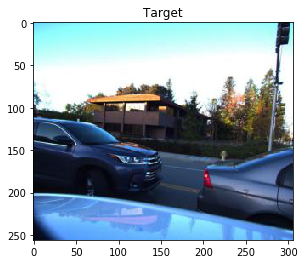

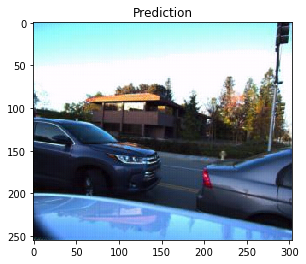

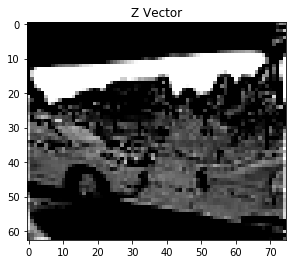

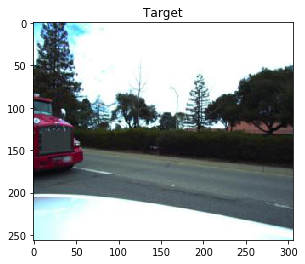

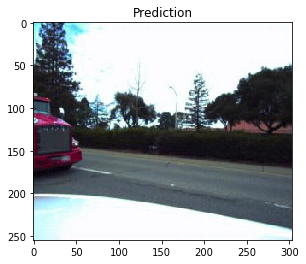

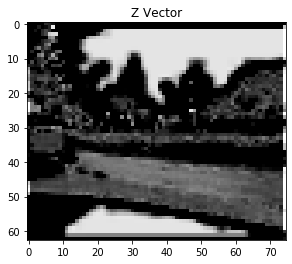

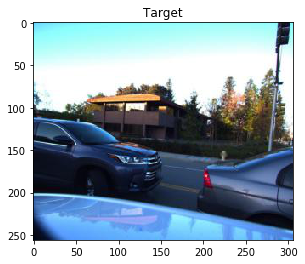

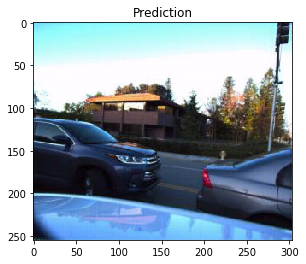

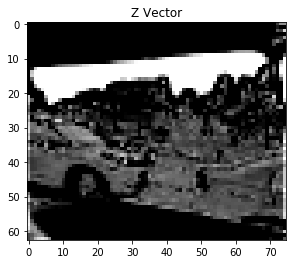

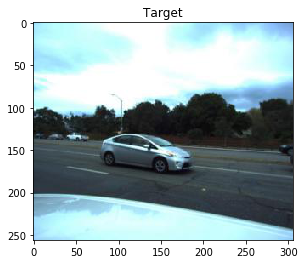

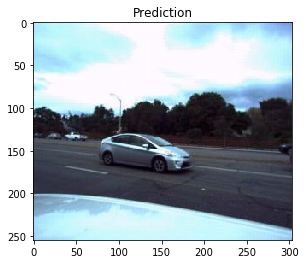

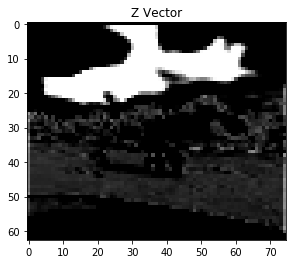

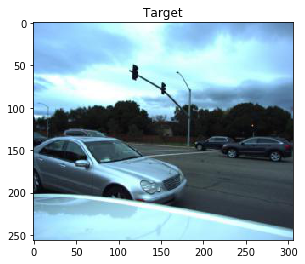

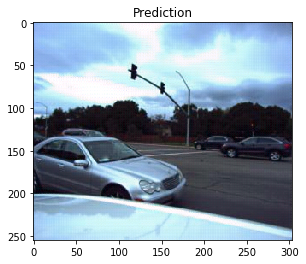

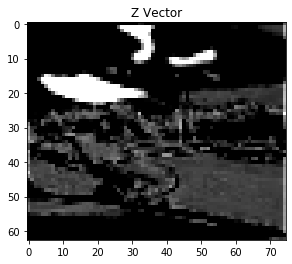

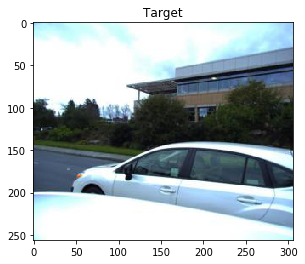

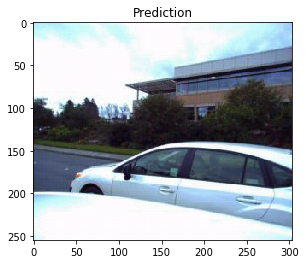

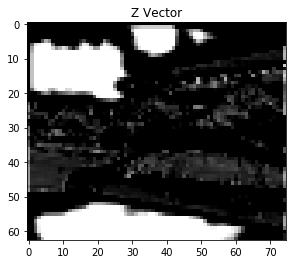

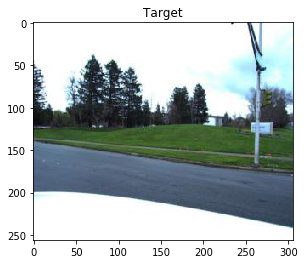

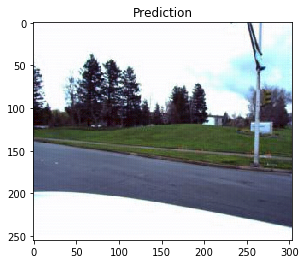

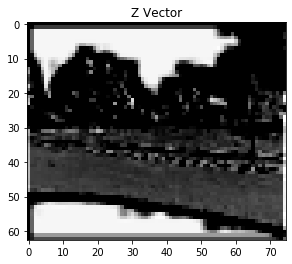

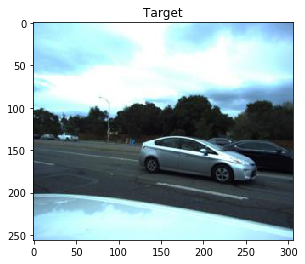

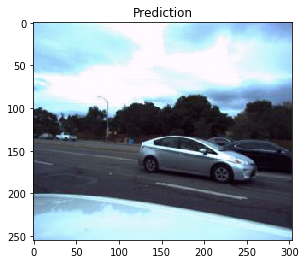

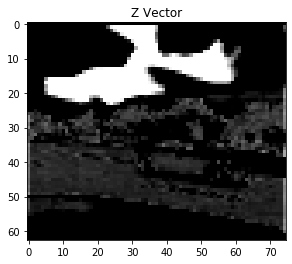

In [4]:
i = 0
for sample in unlabeled_validloader:
    xpred,z = model(sample)
    target = F.pad(sample[:,3],(-2,-1,-1,0))

    print("Loss = ", F.smooth_l1_loss(xpred,target).item())
    i += 1
    if i > 10:
        break
        
    plt.figure()
    plt.title("Target")
    plt.imshow(torchvision.utils.make_grid(sample[:,3], nrow=3).numpy().transpose(1, 2, 0))
    plt.figure()
    plt.title("Prediction")
    plt.imshow(torchvision.utils.make_grid(xpred, nrow=3).detach().numpy().transpose(1, 2, 0))

    plt.figure()
    plt.title("Z Vector")
    plt.imshow(torchvision.utils.make_grid(z[0][0], nrow=3).detach().numpy().transpose(1, 2, 0))


In [ ]:
results = np.loadtxt('autoencoder_results_1.0e-03_0.0e+00_4_25.txt')

In [ ]:
plt.title("Loss Curve")
plt.plot(results[:,1],label = 'Training')
plt.plot(results[:,2],label =  'Validation')
plt.legend()
plt.yscale('log')